In [2]:
from pathlib import Path
from IPython.display import Image, display
import pandas as pd

ROOT = Path.cwd().parent
ART  = ROOT / "artifacts"
FIG  = ART / "figures"

# Cluster name lookup
cluster_names = pd.read_csv(ART / "cluster_names.csv")
cluster_names

,cluster,cluster_name
0,0,🏢 Business / Commercial Hubs
1,1,🏠 Residential Evening Areas
2,2,🛍️ Leisure & Mixed-use Districts


# 📊 CDR Mobility & Traffic Report — Milan

**Dataset:** Kaggle (Marco Dena — Mobile Phone Activity in Milan)  
**Scope:** Mobile internet usage aggregated in 250m grid cells (sms, call, internet)  
**Goal:** Identify distinct spatial–temporal activity patterns in Milan using clustering.  


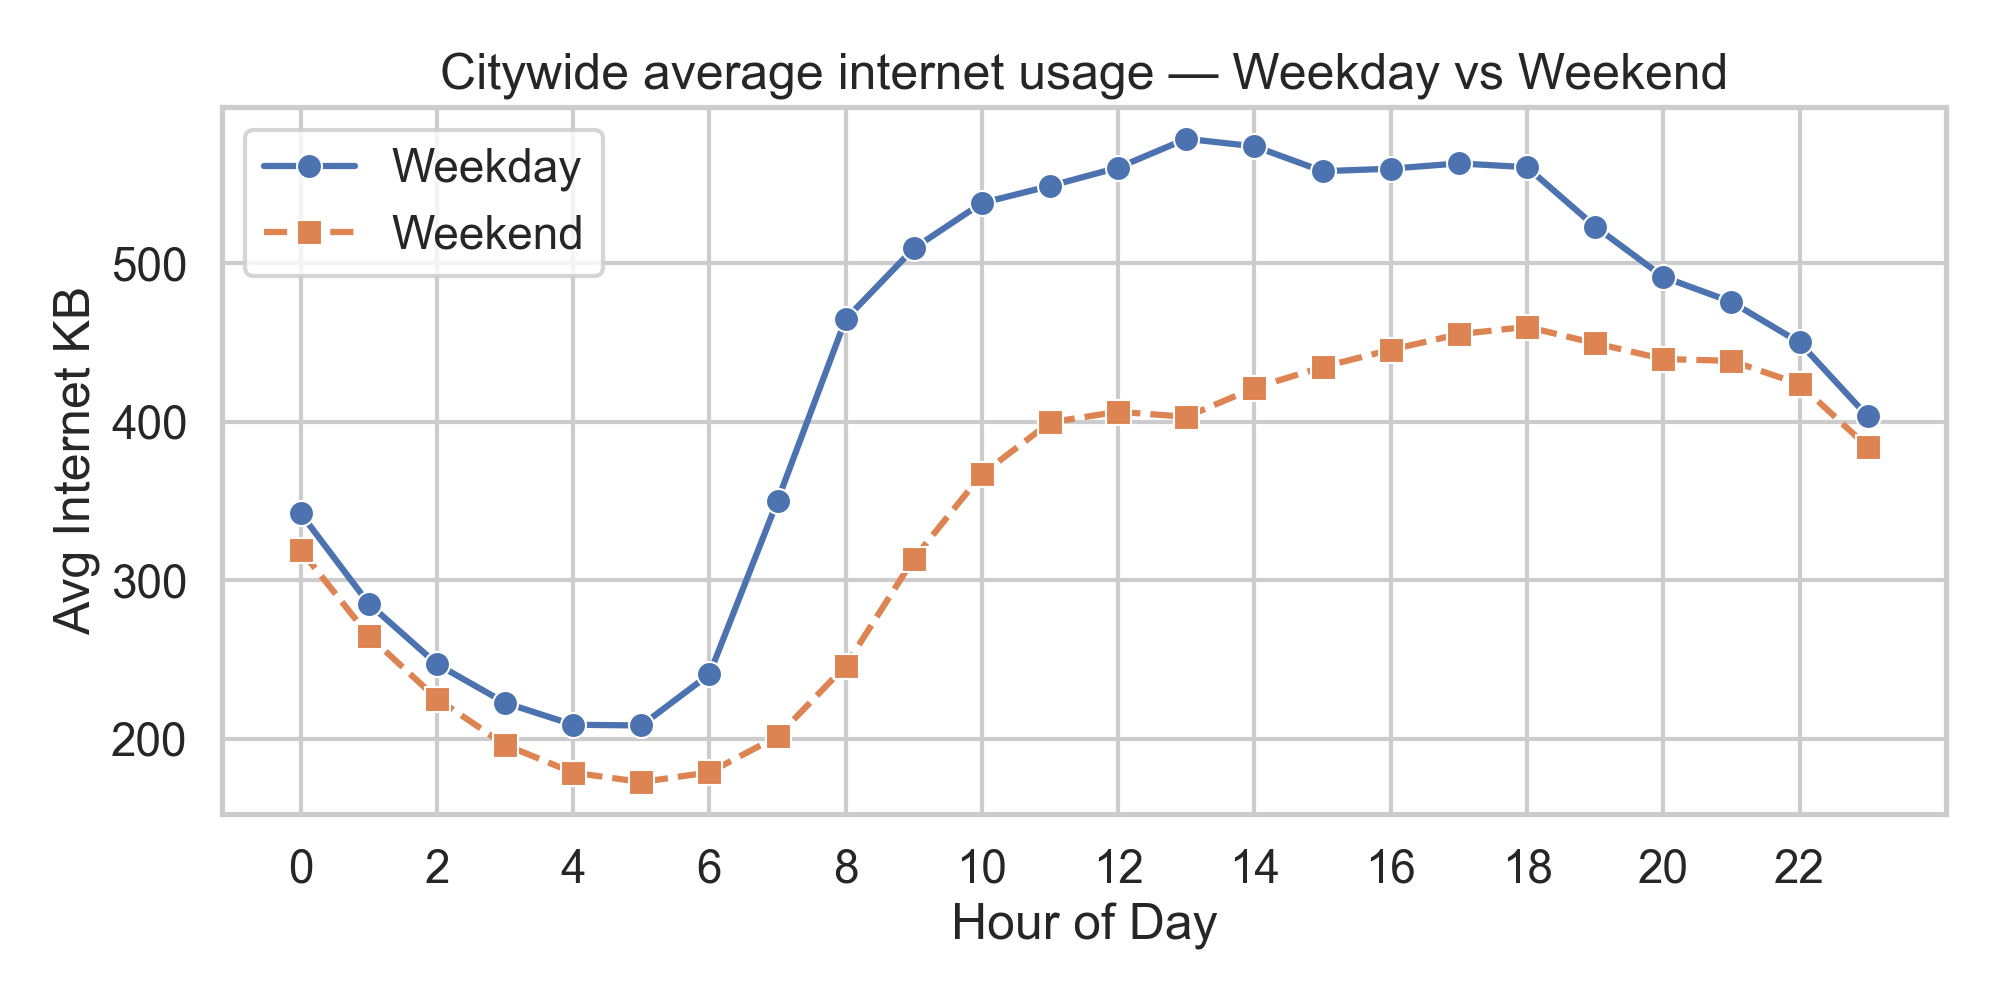

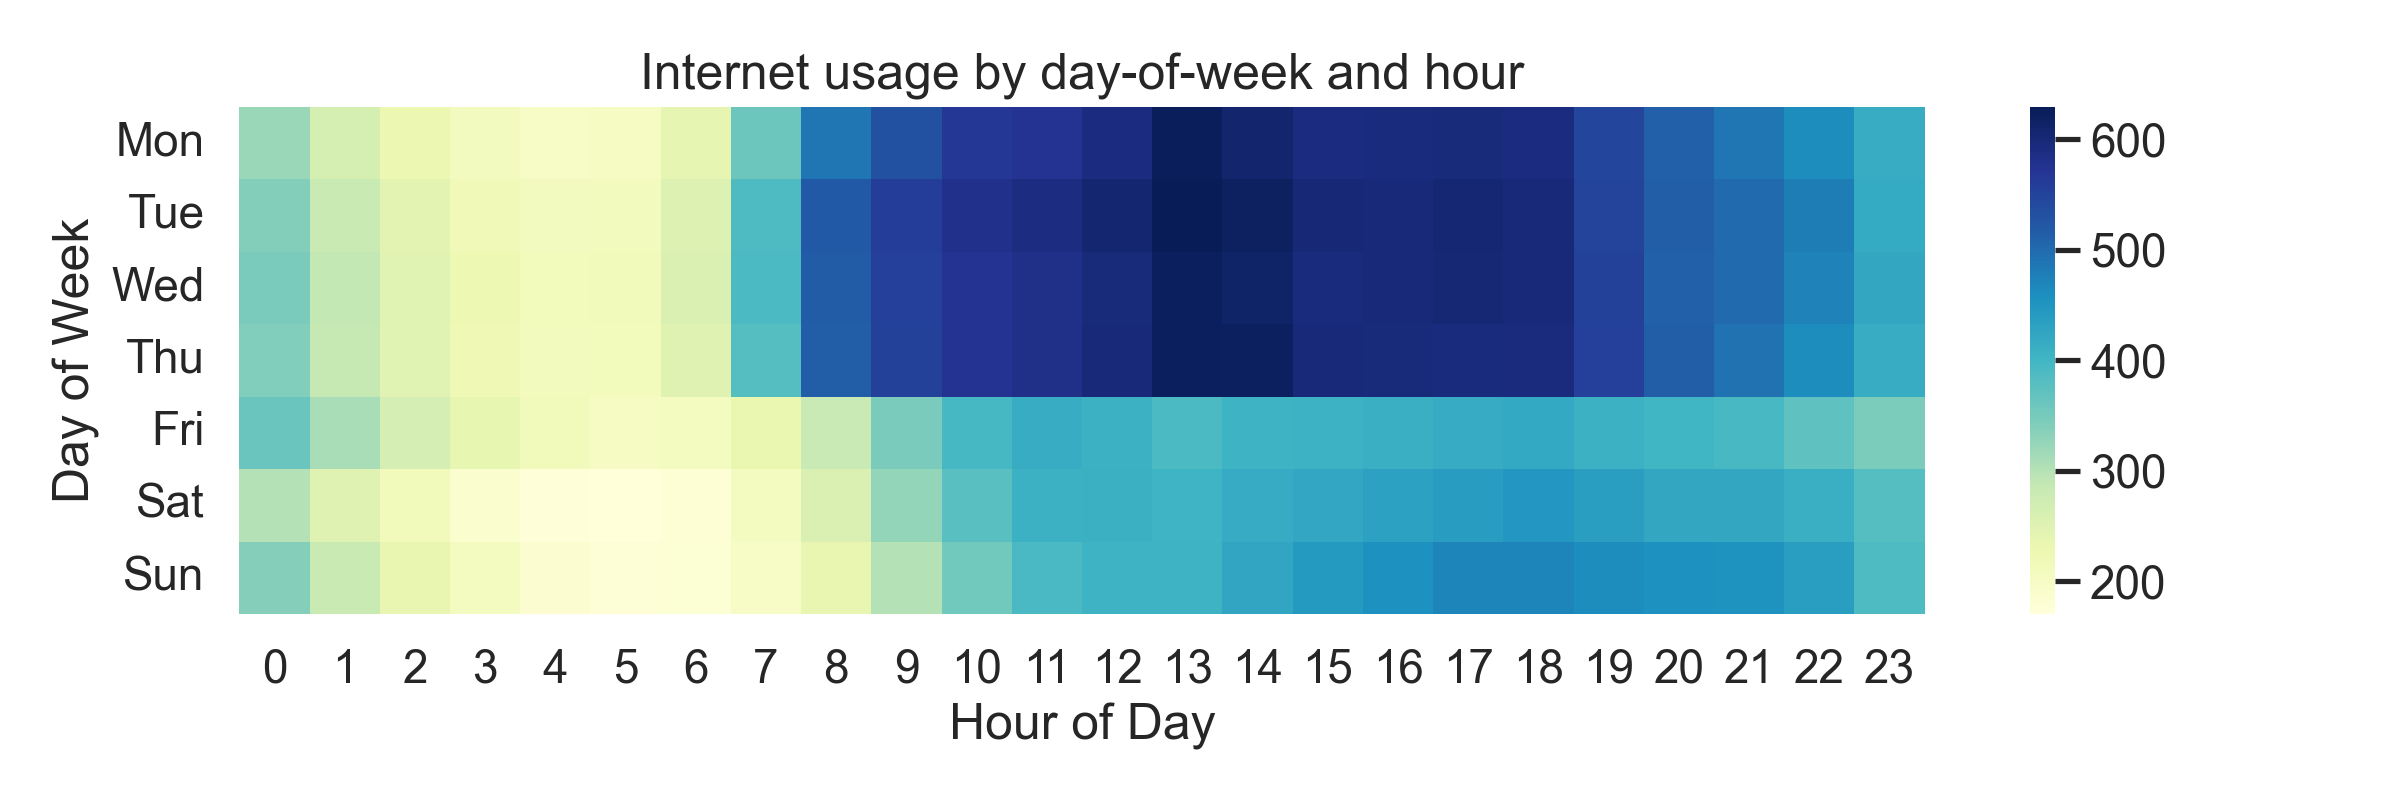

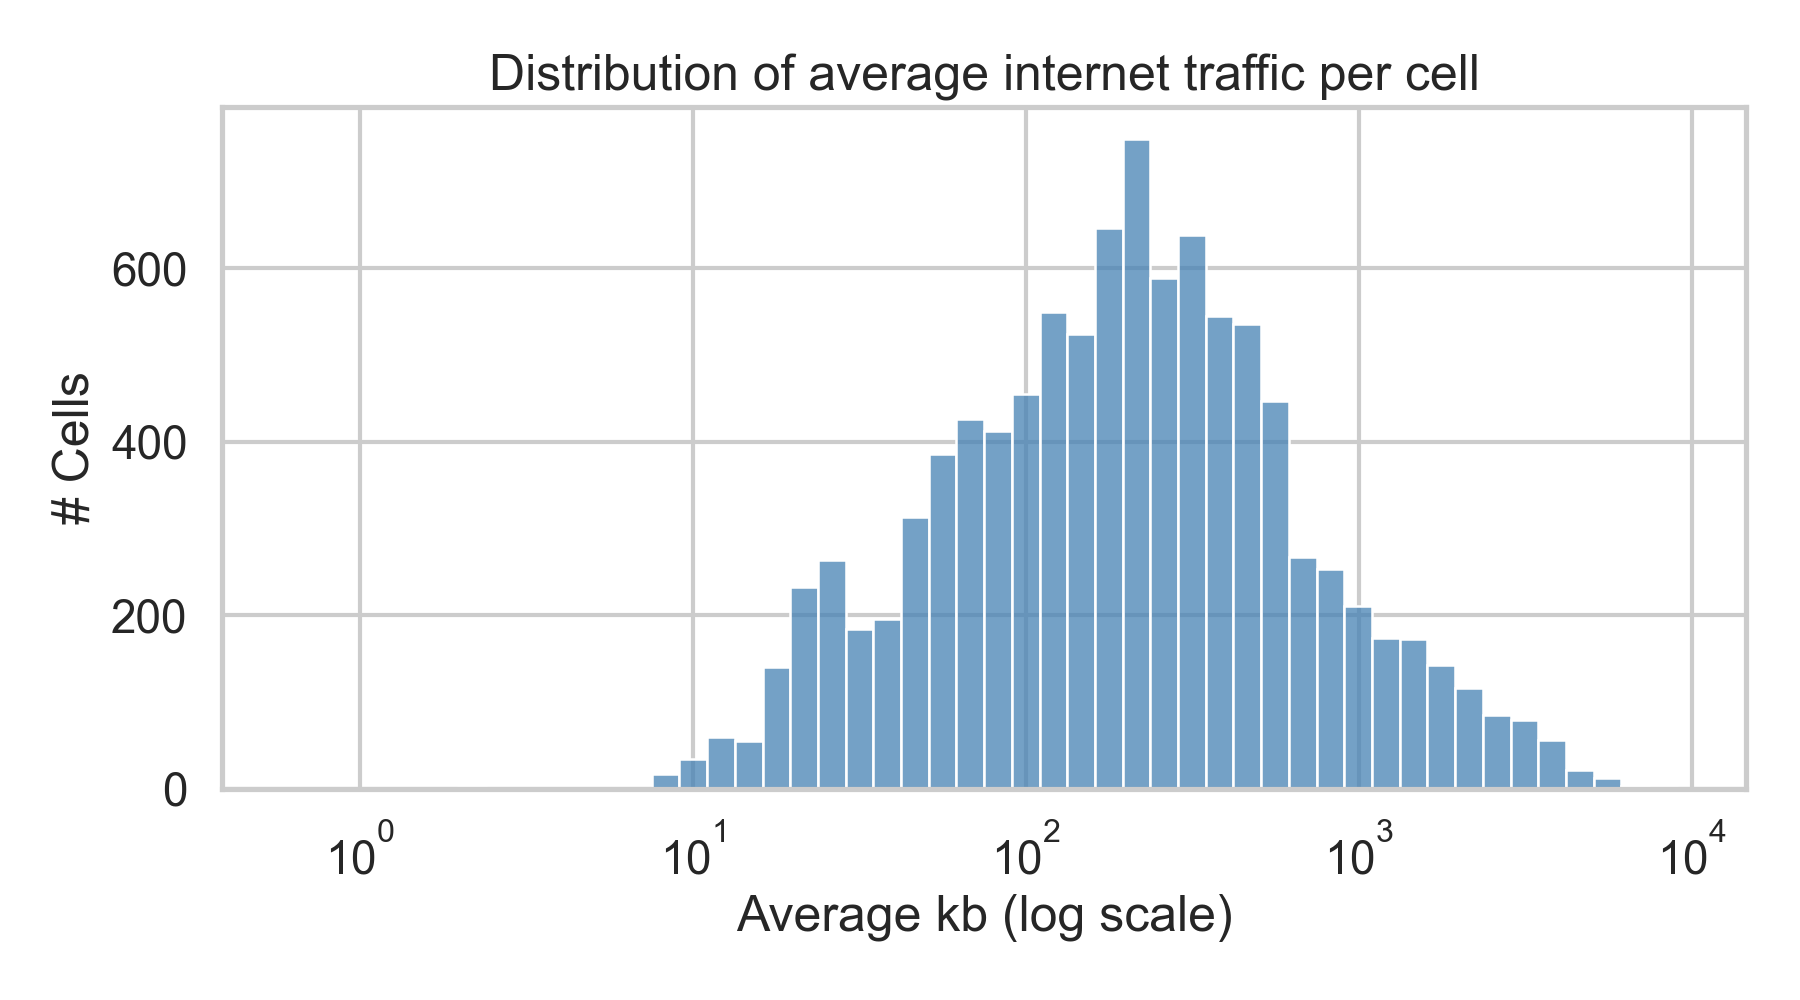

In [4]:
display(Image(filename=str(FIG / "city_diurnal_weekday_weekend.png")))
display(Image(filename=str(FIG / "heatmap_dow_hour.png")))
display(Image(filename=str(FIG / "avg_volume_distribution.png")))


## 🌍 Citywide Patterns

- **Diurnal curve**:  
  Weekdays show sharp peaks during **business hours (9–18h)**.  
  Weekends start later in the morning and sustain higher **evening activity**.  

- **Heatmap (dow × hour)**:  
  Consistent weekday rhythm; weekends shift usage toward **later evenings**.  

- **Histogram of cell volumes**:  
  Strong skew → most cells have low activity, but a **few hotspots dominate traffic**.  
  This justifies adding the **log-average volume** feature in clustering.  


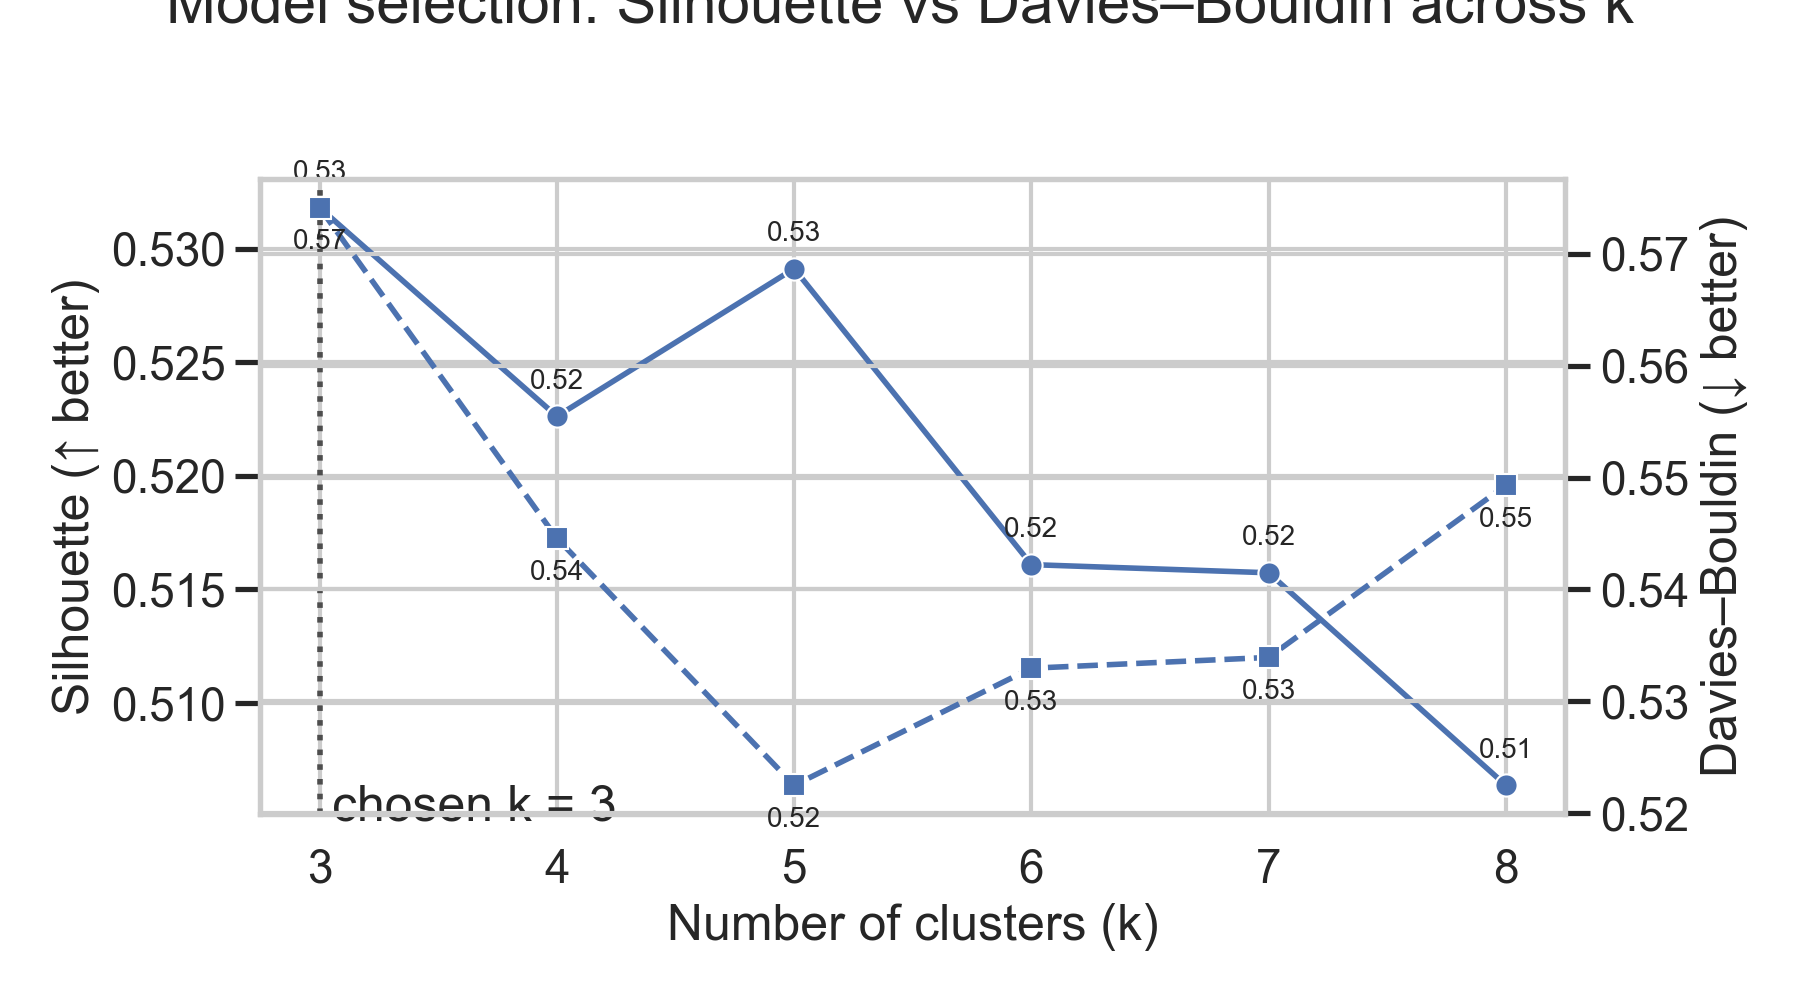

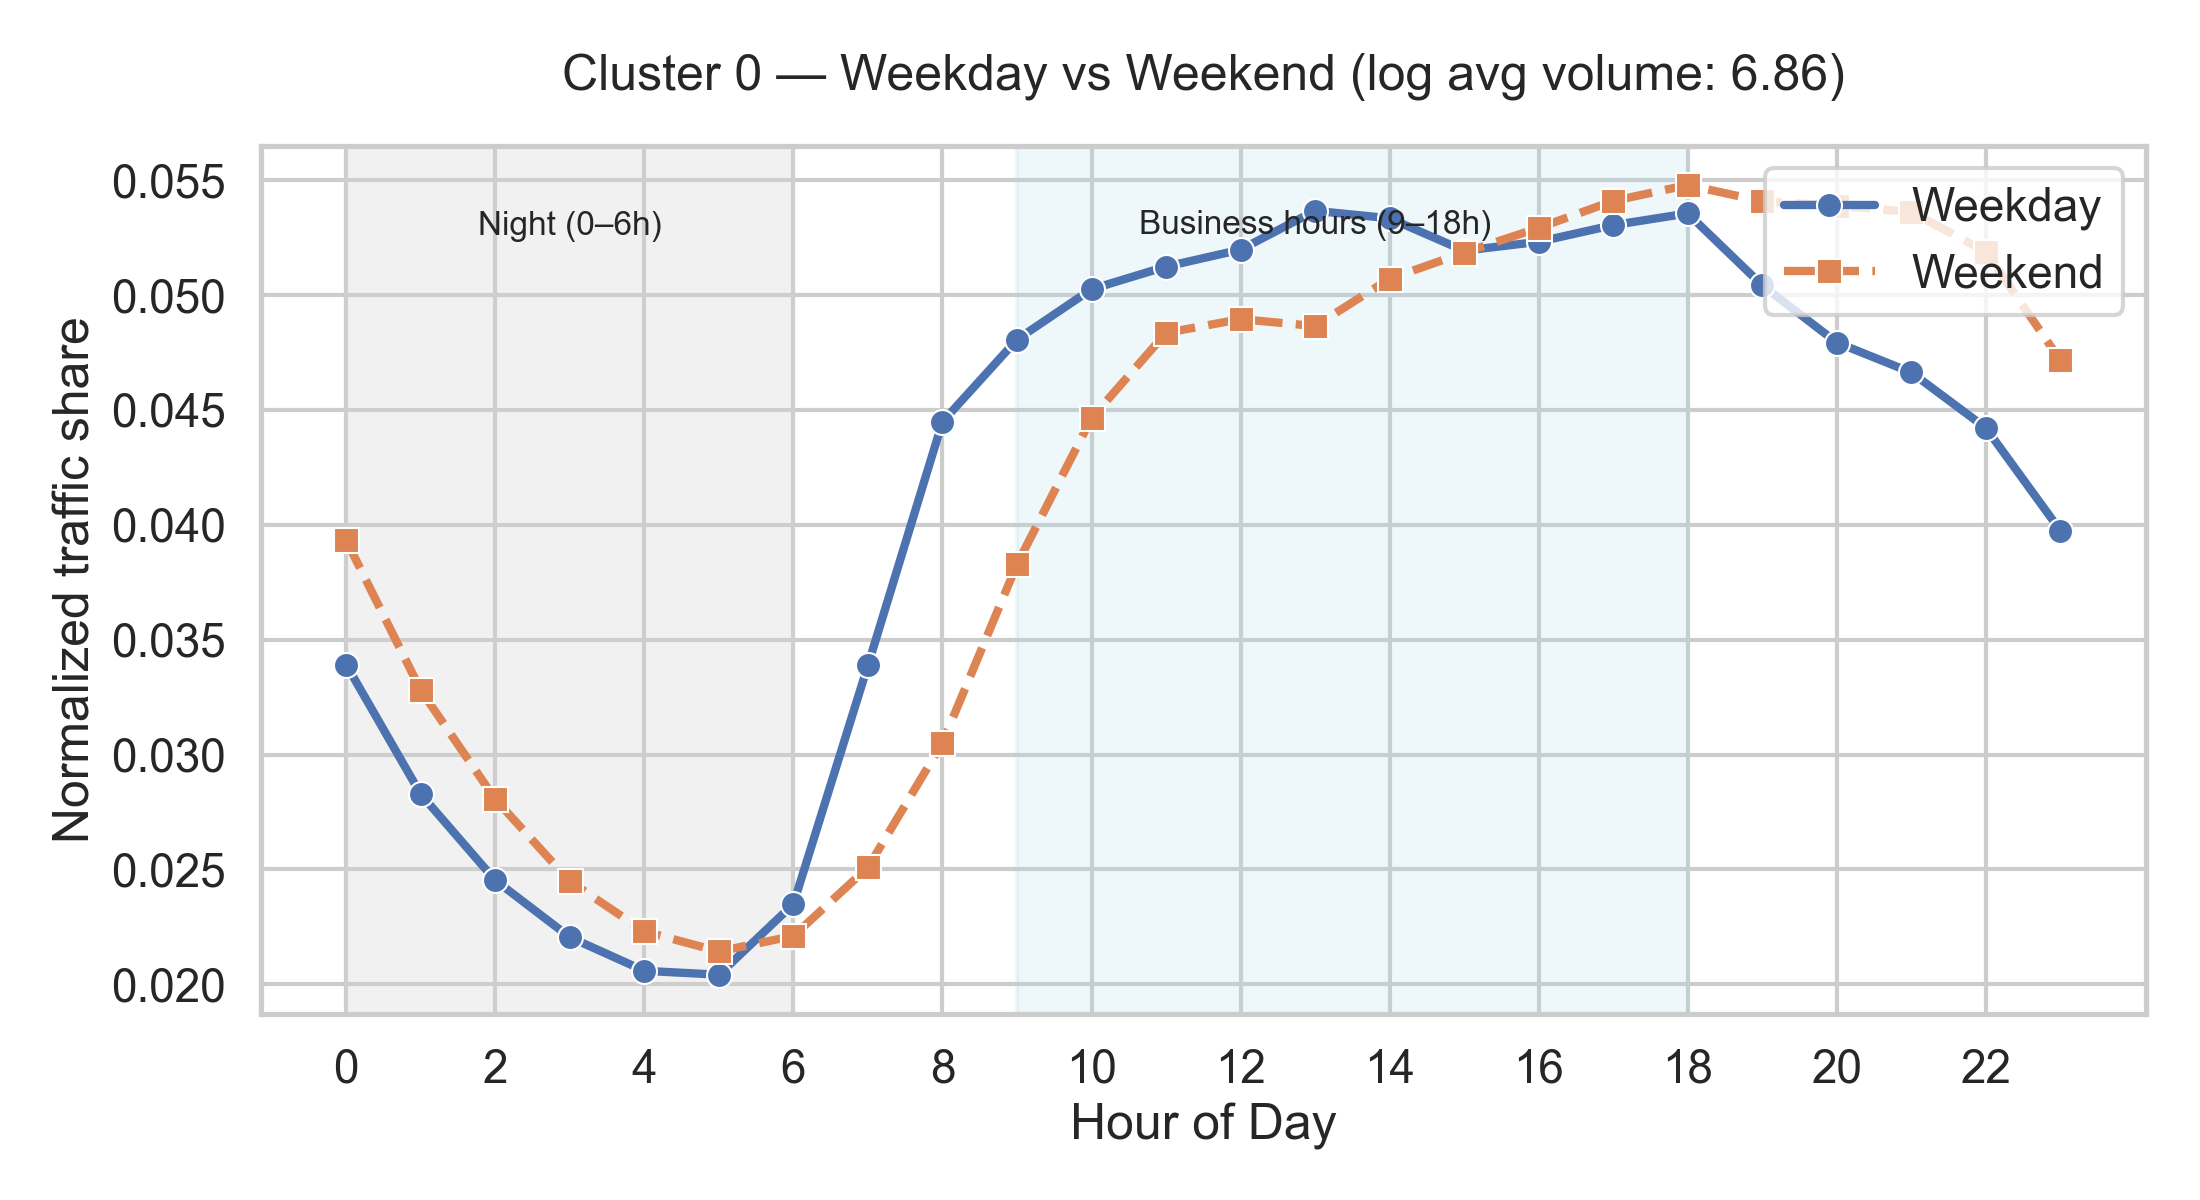

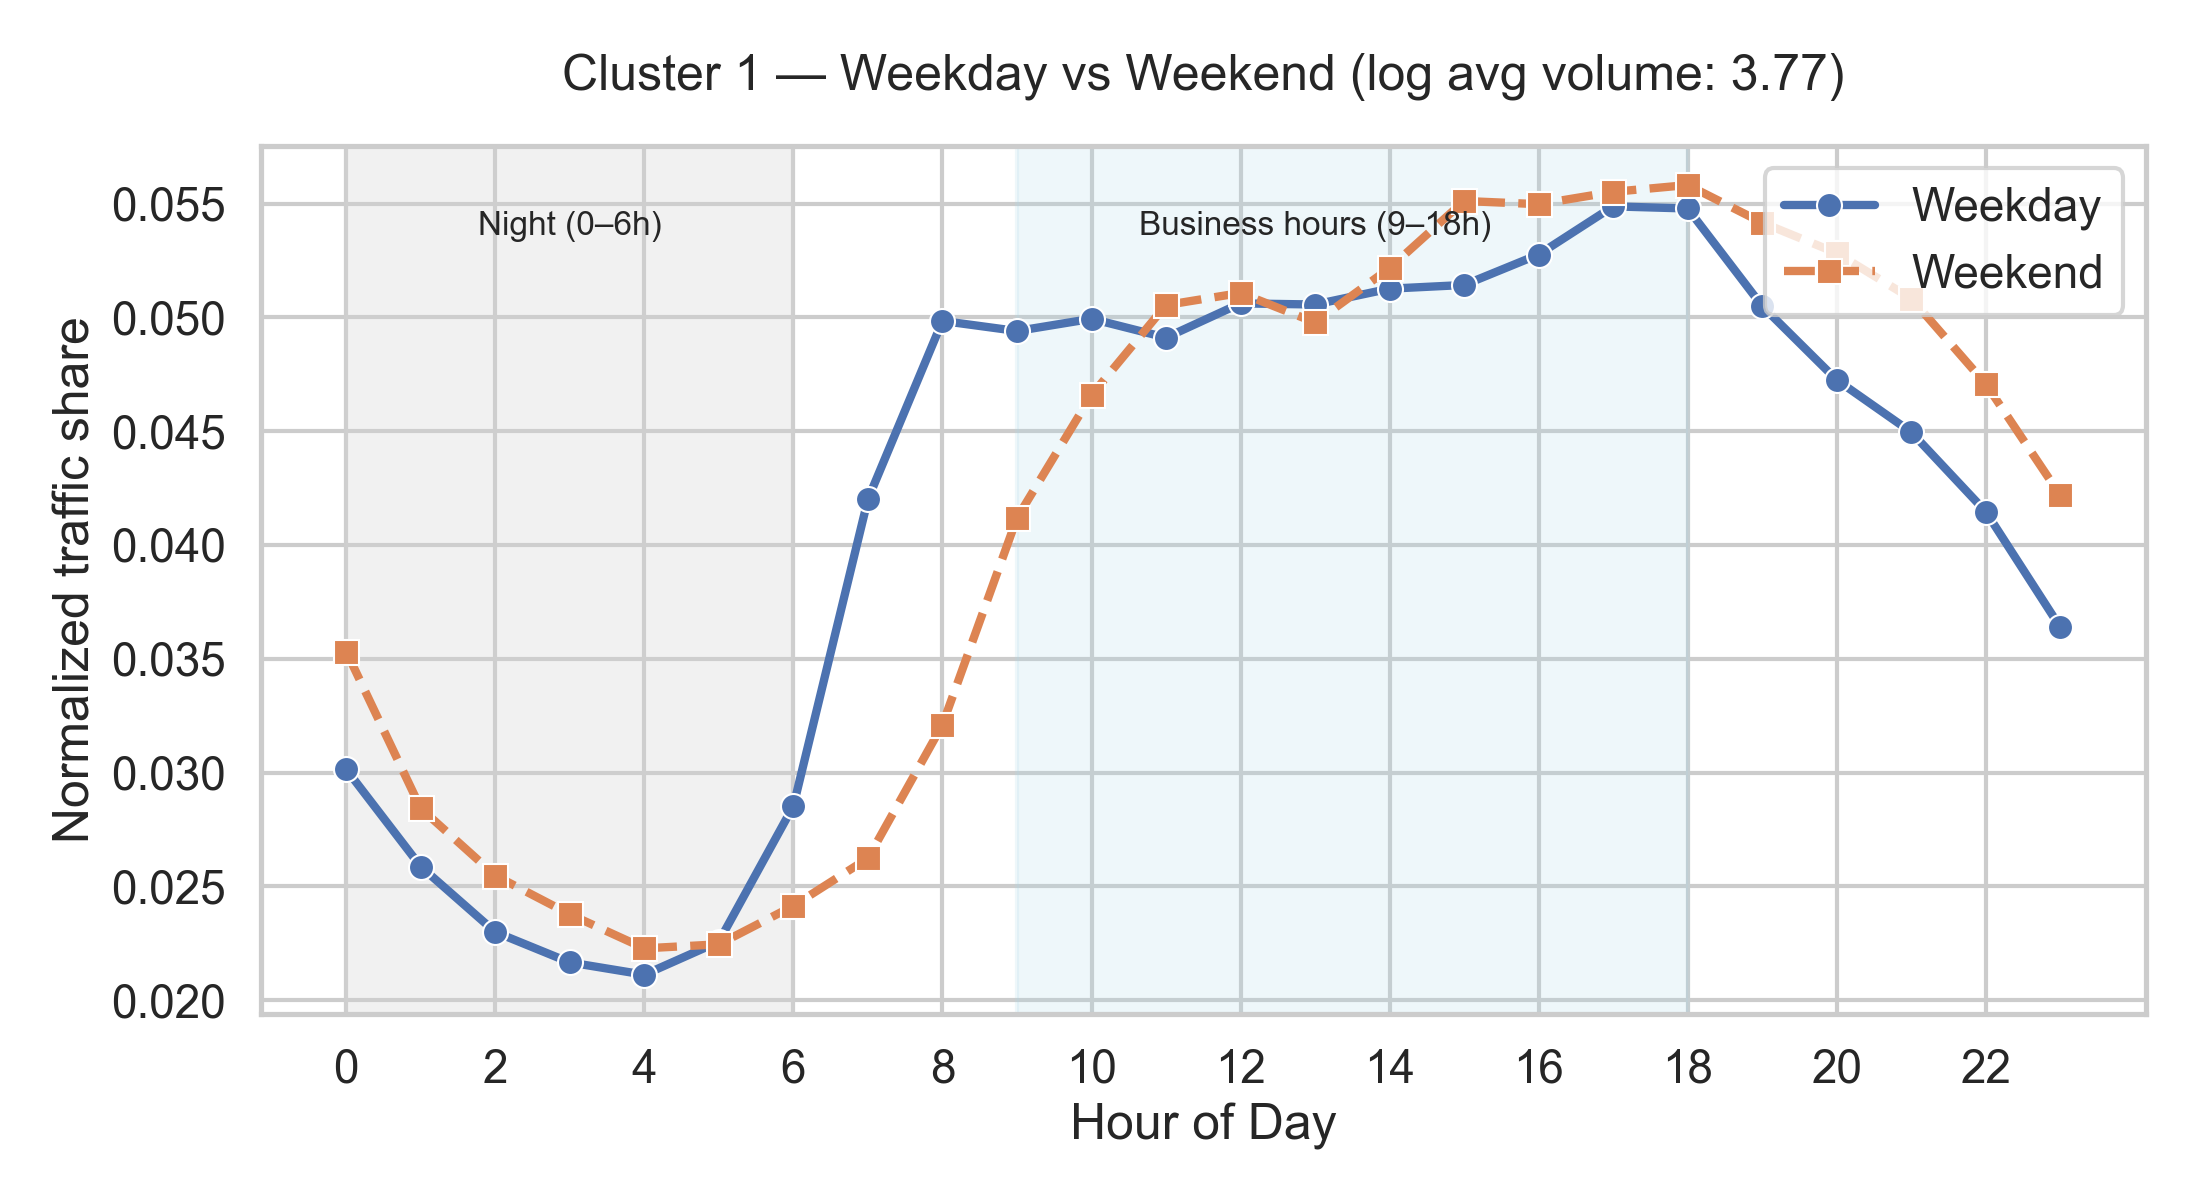

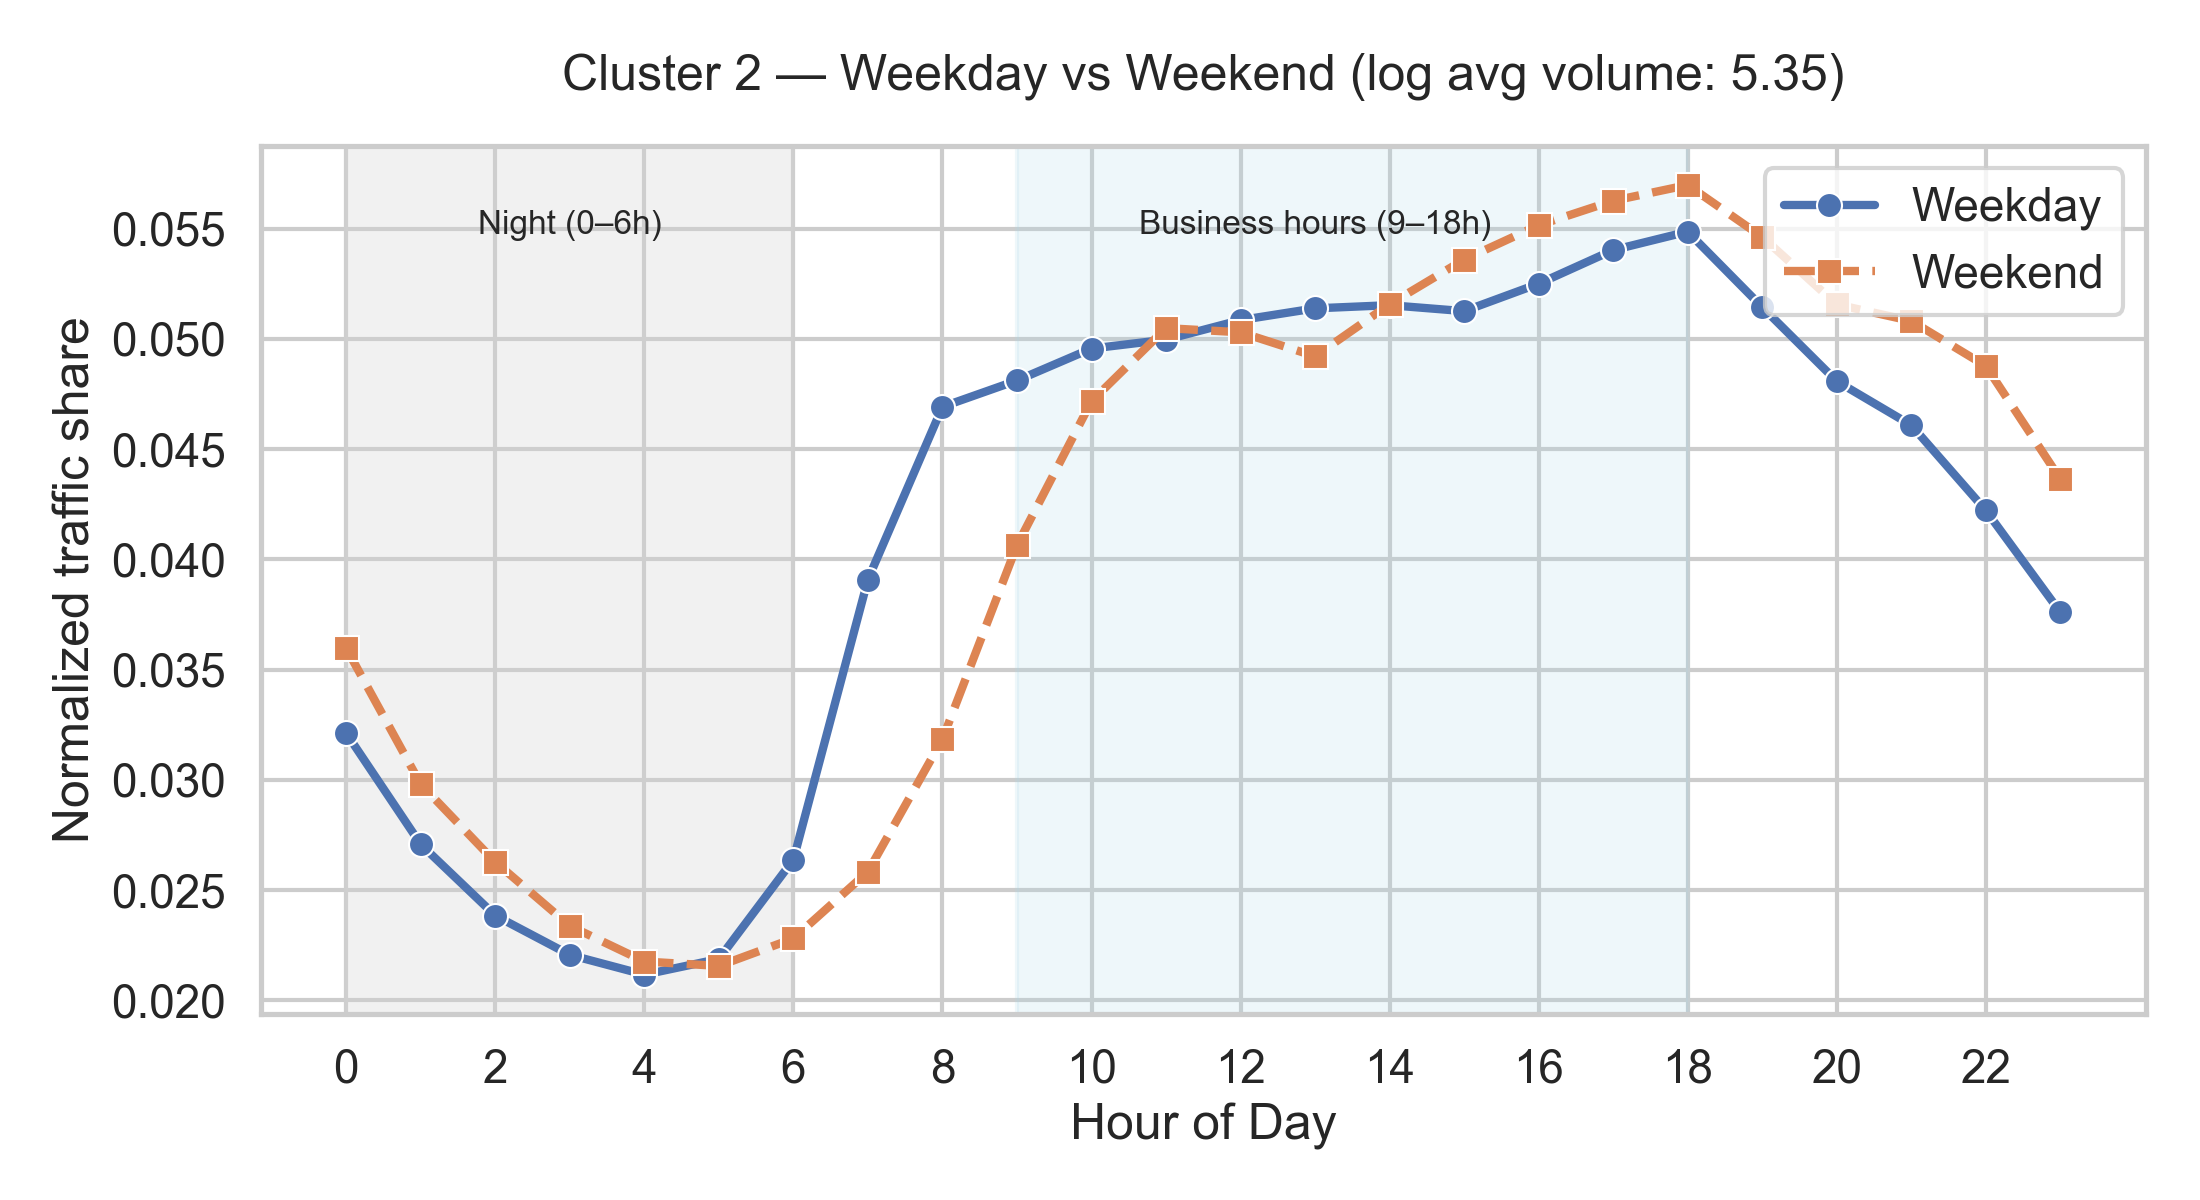

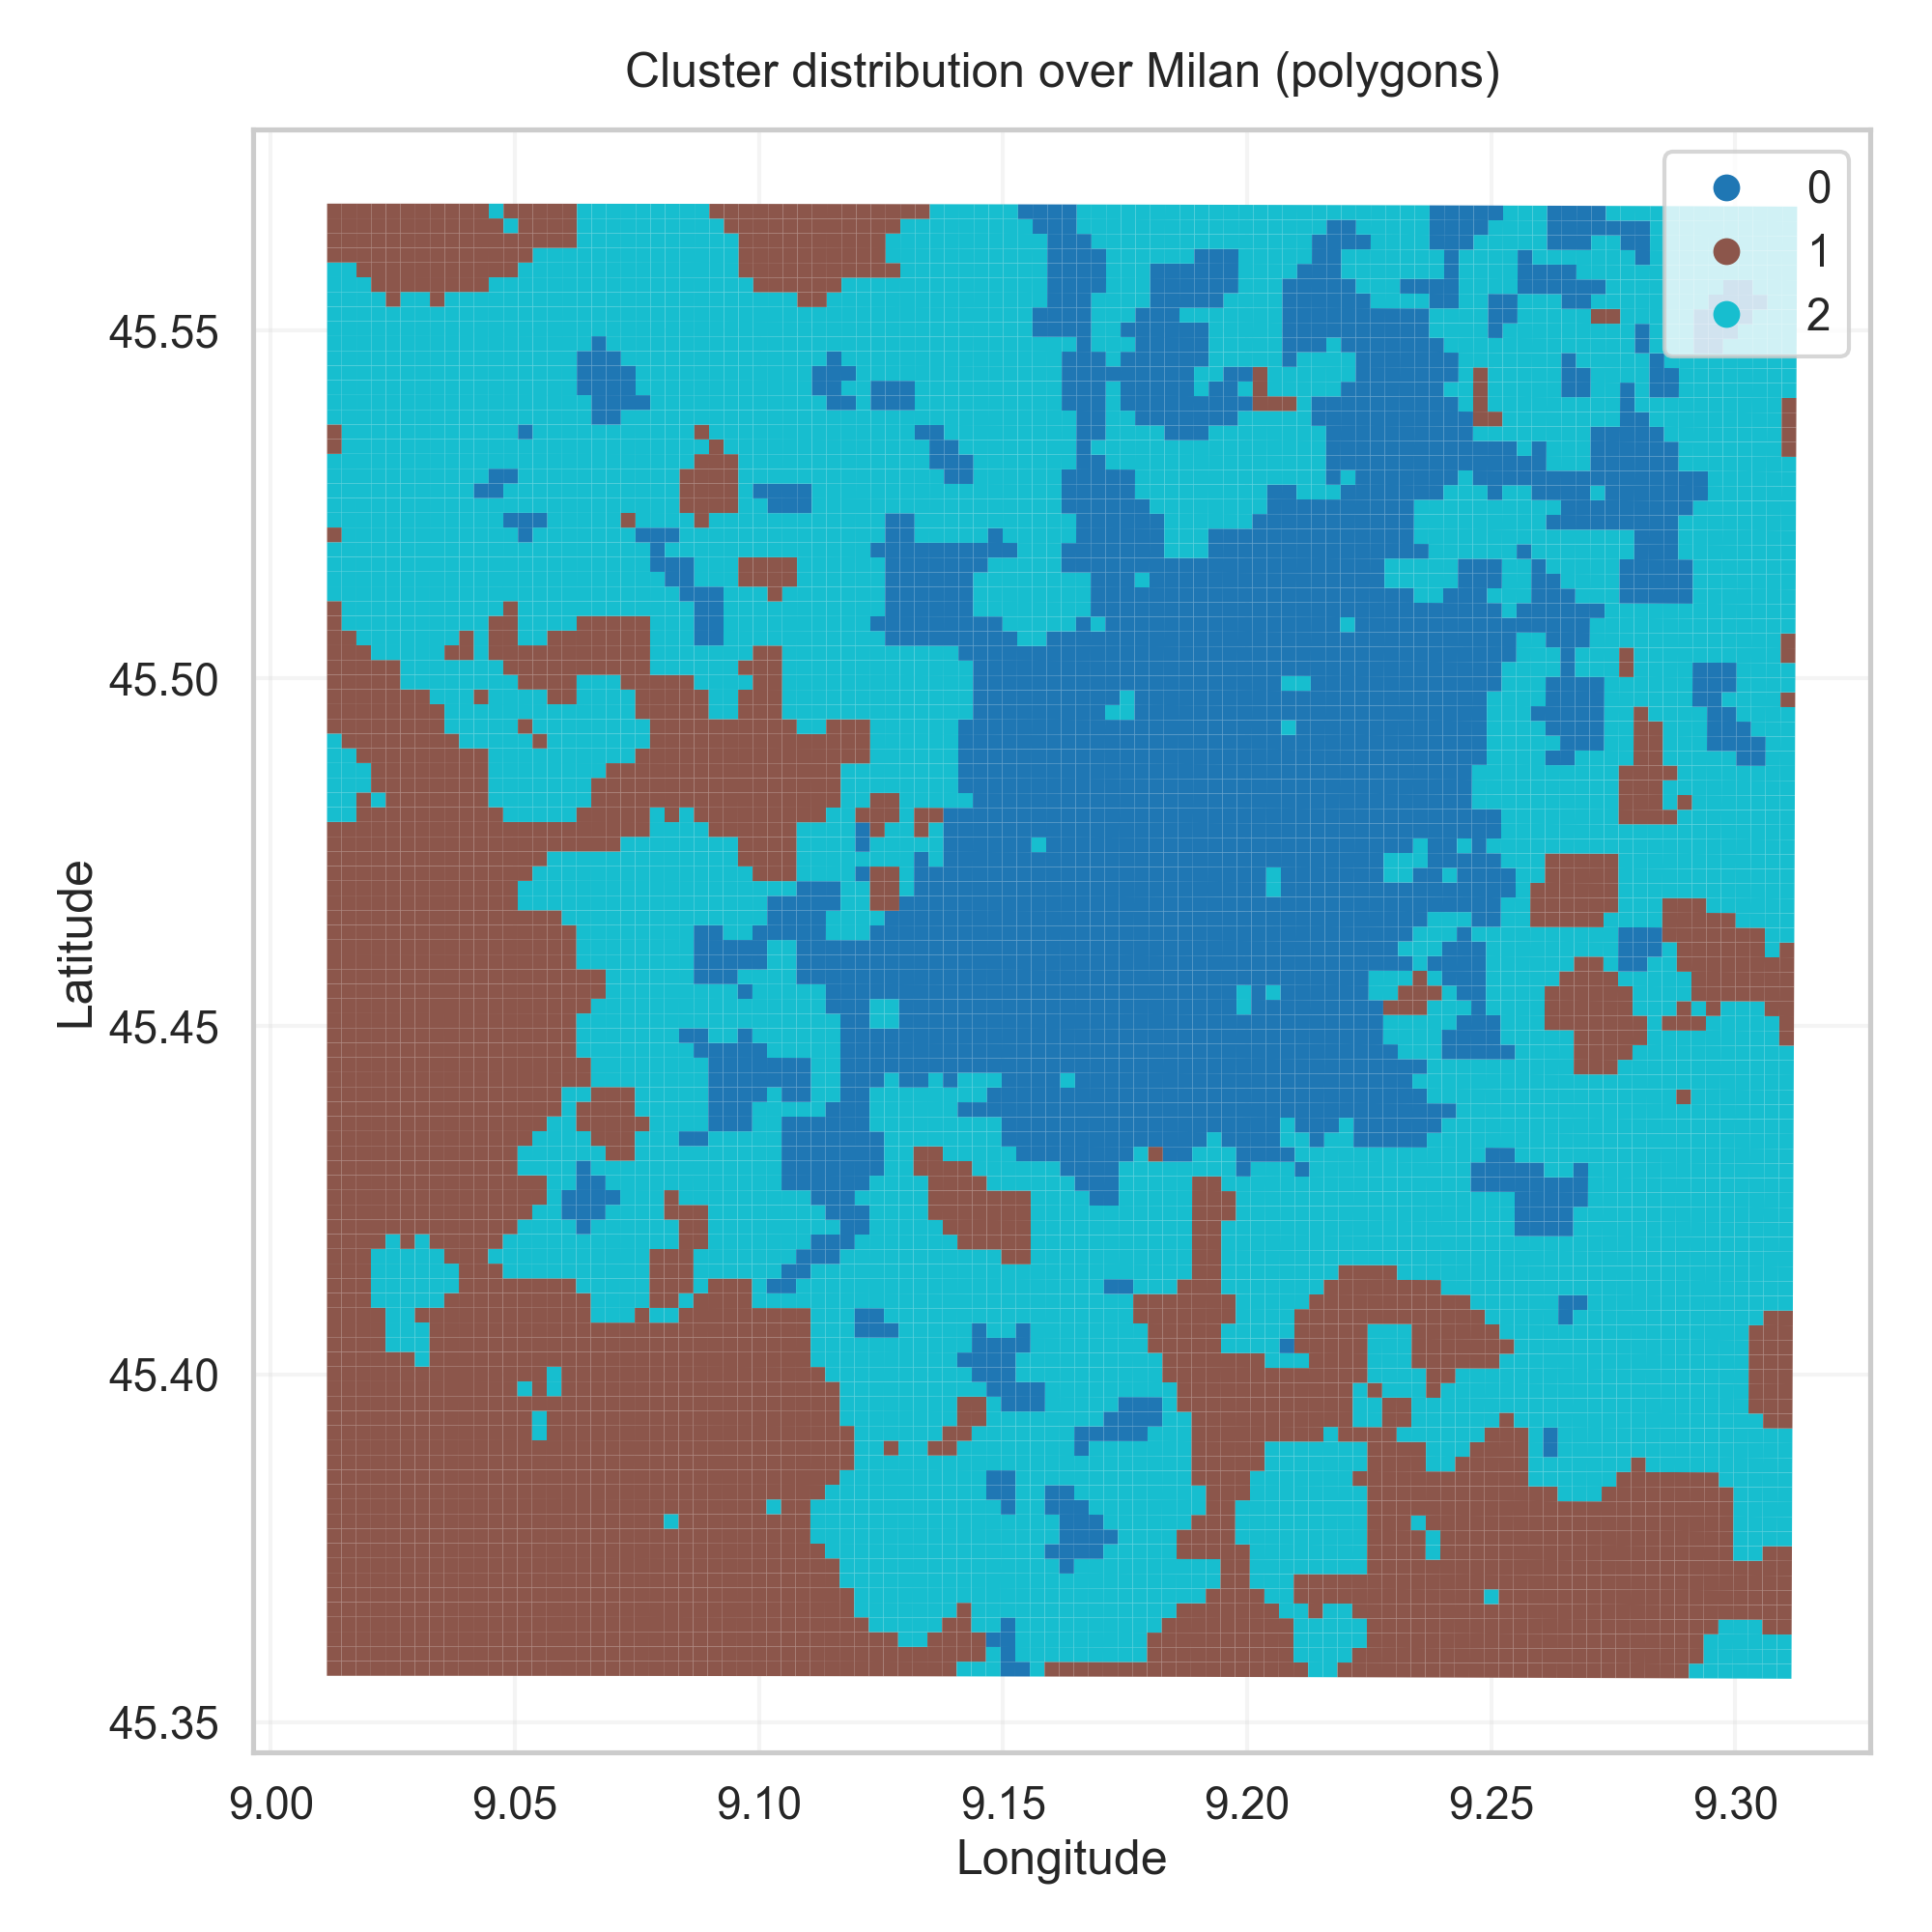

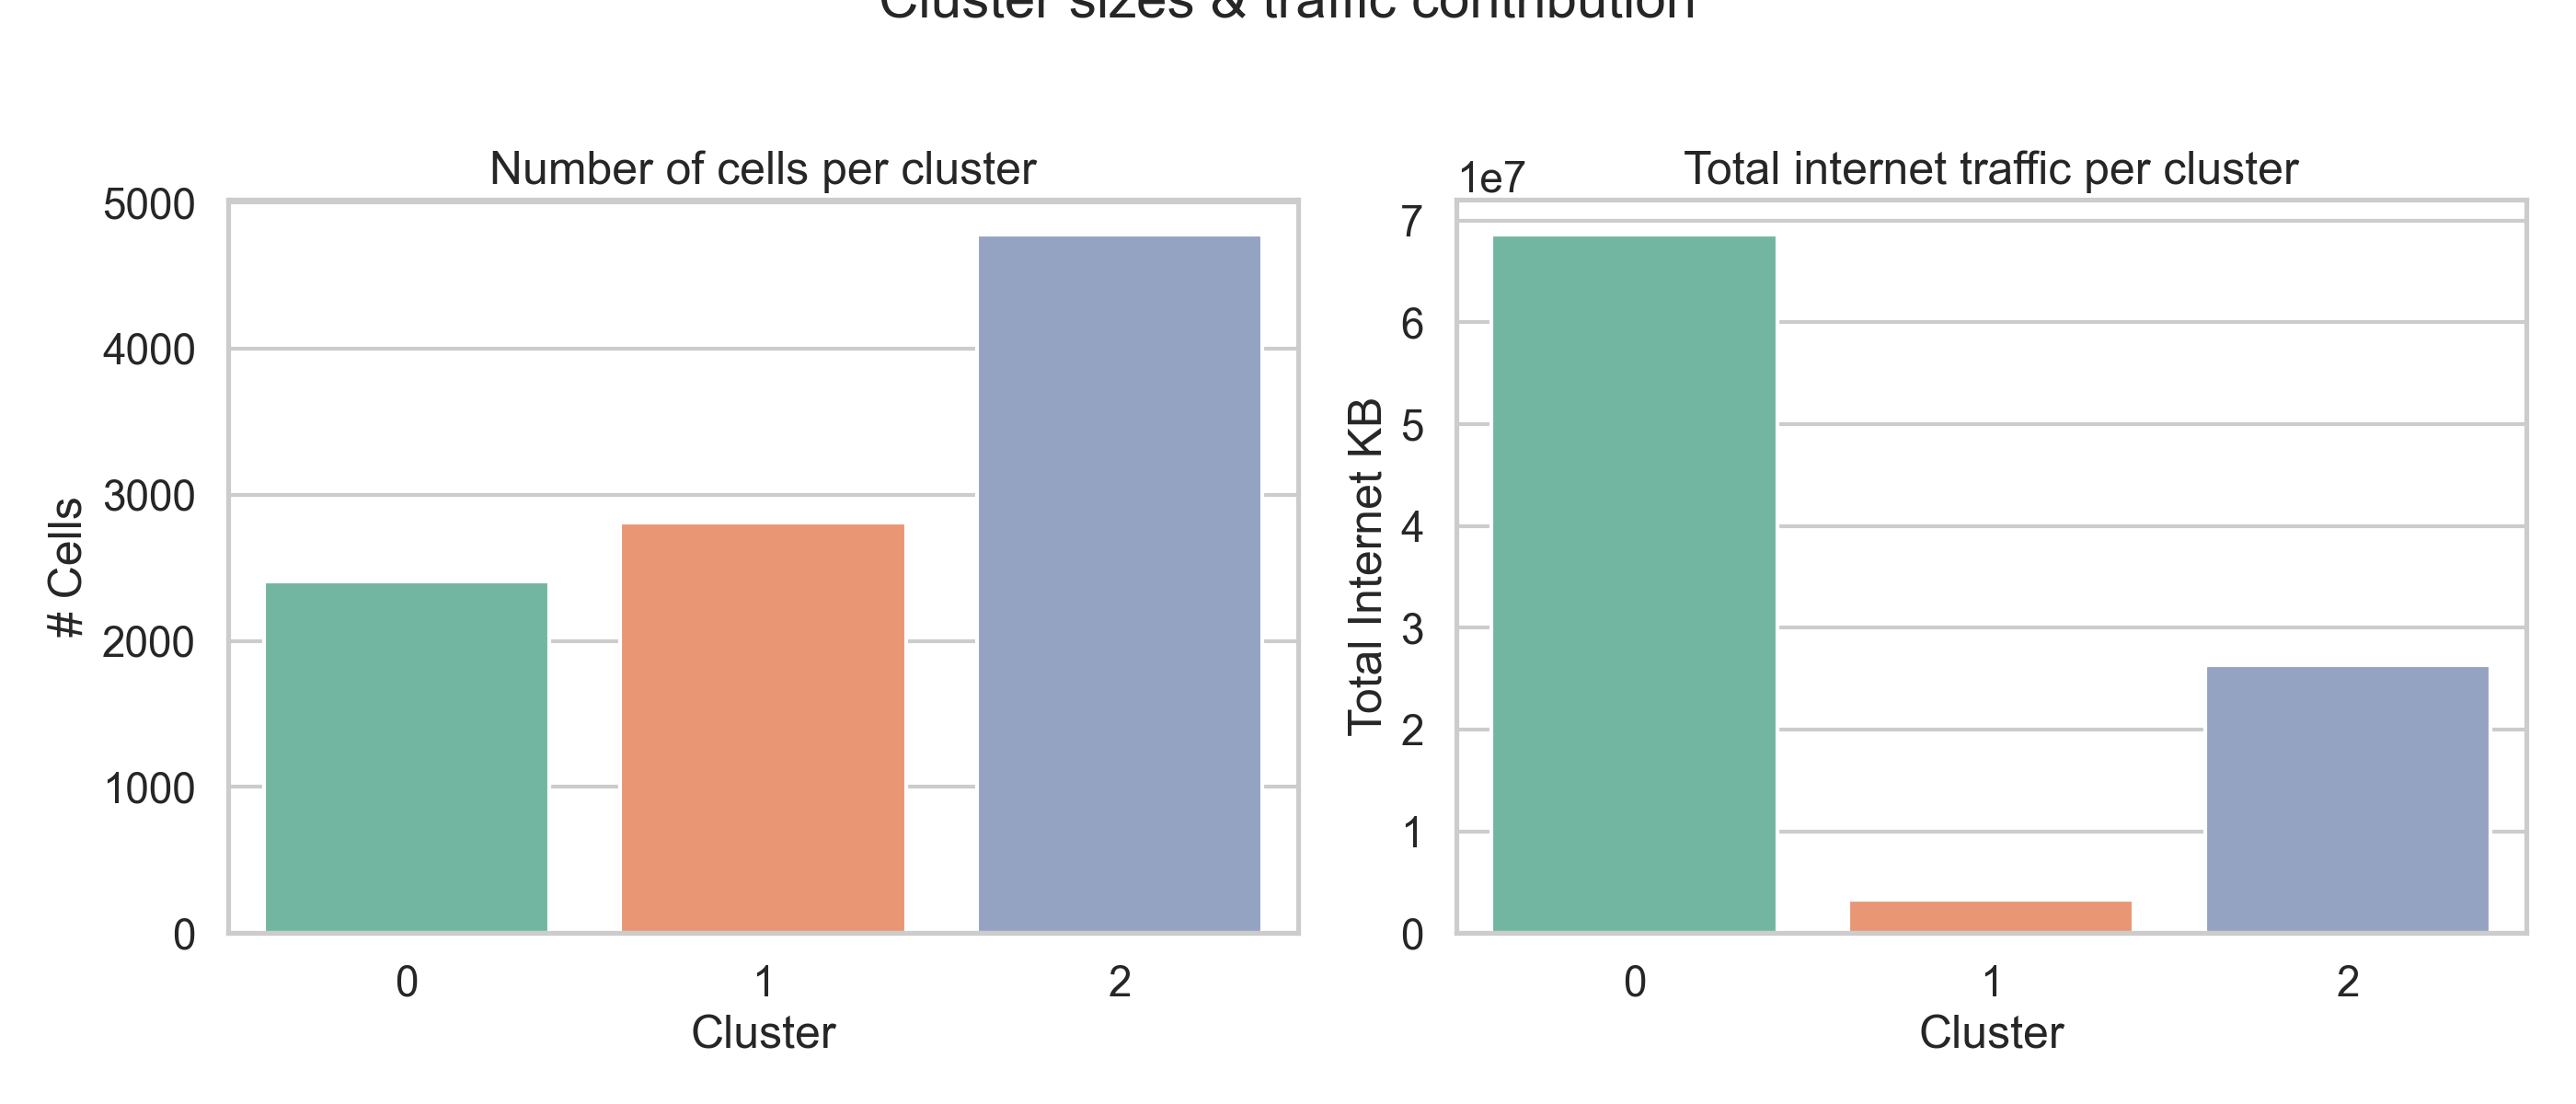

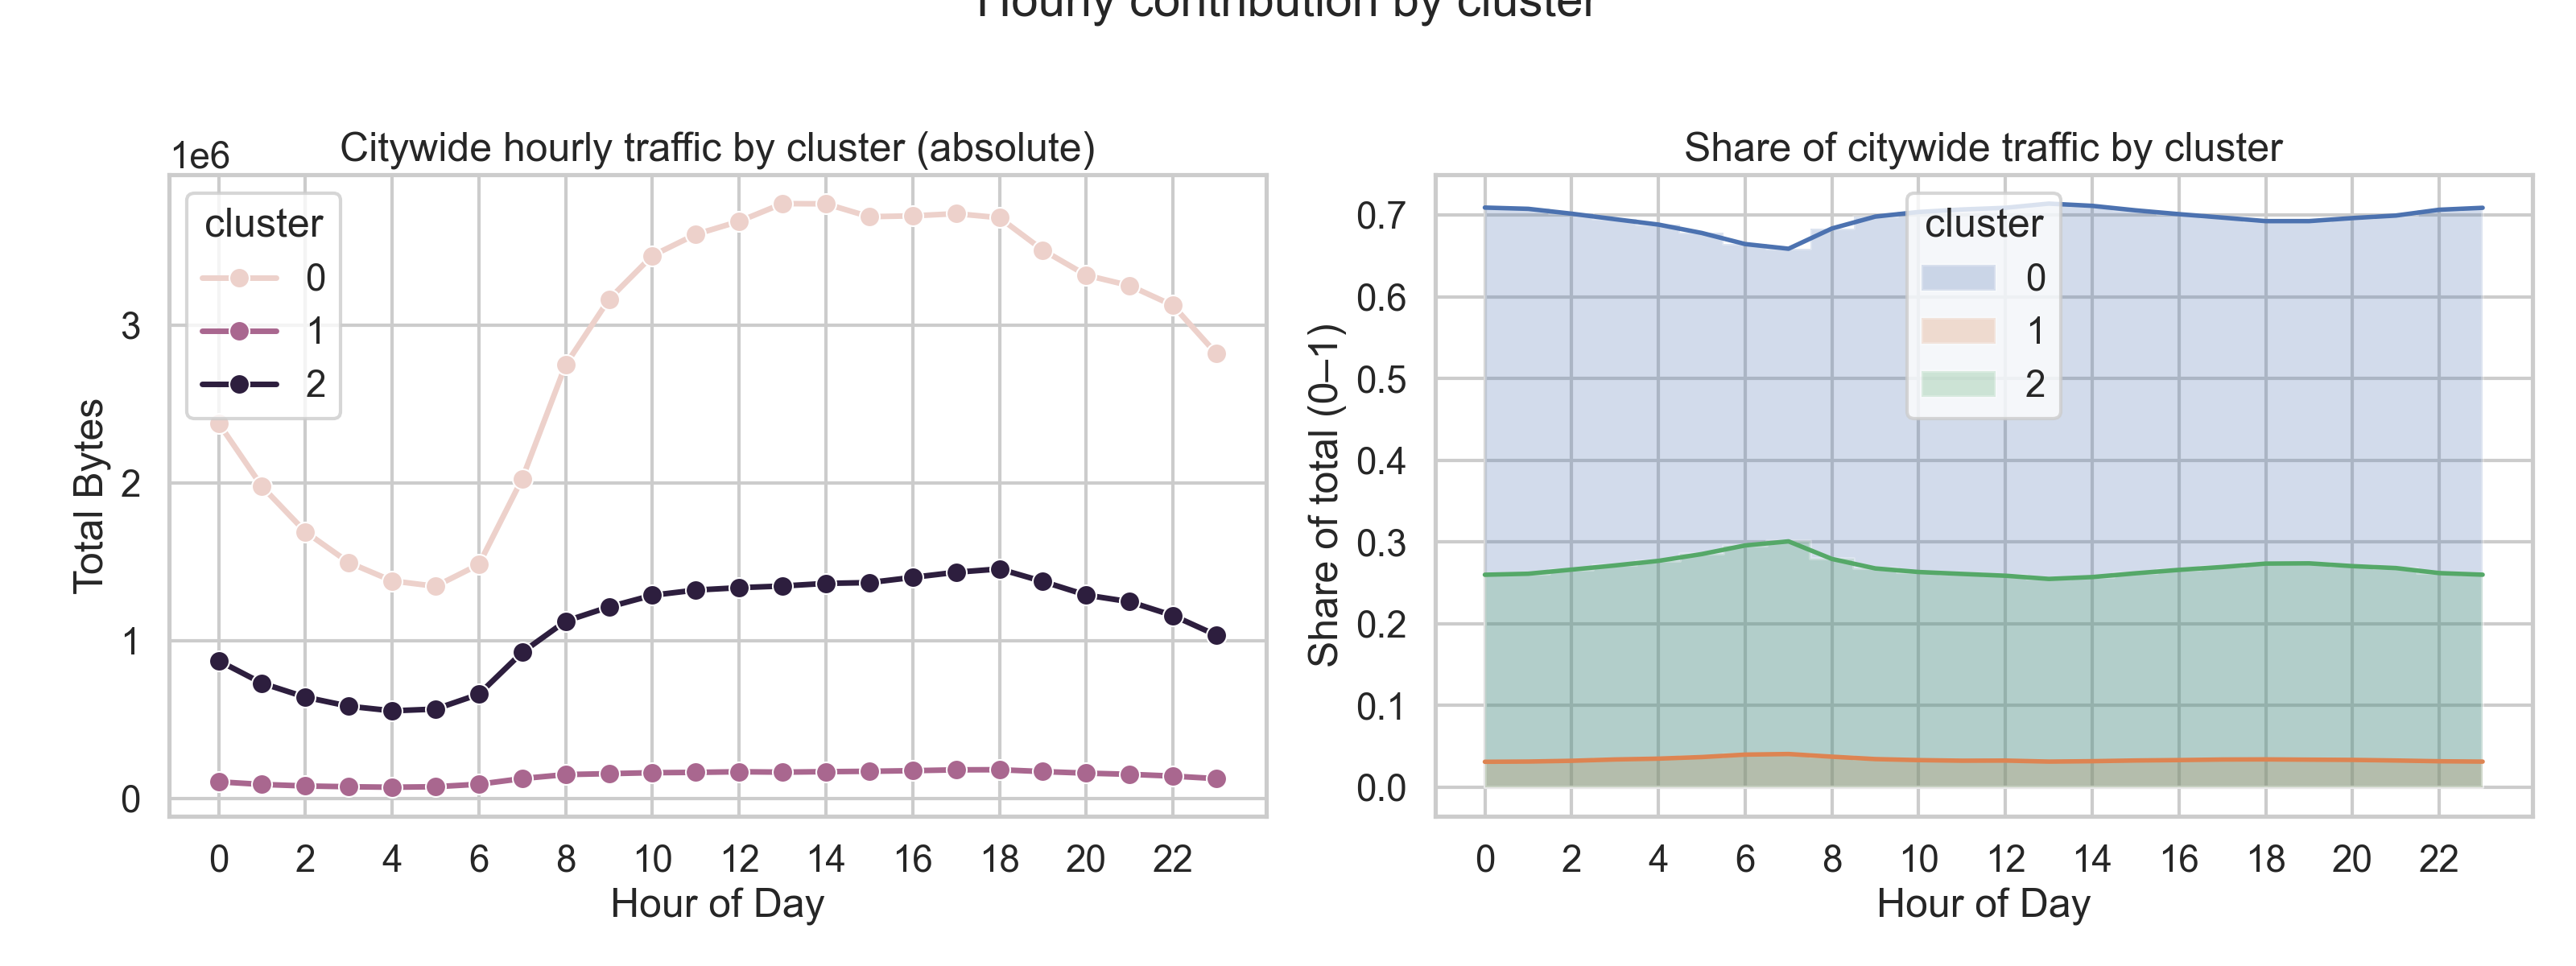

In [5]:
display(Image(filename=str(FIG / "k_selection_from_artifacts.png")))

# Temporal profiles for each cluster
for c in cluster_names["cluster"].unique():
    display(Image(filename=str(FIG / f"cluster_{c}_profile_from_artifacts.png")))

display(Image(filename=str(FIG / "cluster_map_from_csv_geojson.png")))
display(Image(filename=str(FIG / "cluster_sizes_contribution.png")))
display(Image(filename=str(FIG / "hourly_contribution_by_cluster.png")))


## 🔎 Cluster Analysis

- **Model selection (k=3)**:  
  Silhouette and Davies–Bouldin metrics both favor **3 clusters**, ensuring clear separation and compact groups.  

- **Cluster profiles**:  
  - **Cluster 0 (🏢 Business hubs)**: sharp weekday daytime peak, highest volume.  
  - **Cluster 1 (🏠 Residential areas)**: flatter curve, stronger evenings/weekends, lowest volume.  
  - **Cluster 2 (🛍️ Mixed-use districts)**: balanced weekday/weekend usage, medium volume.  

- **Spatial distribution**:  
  - Cluster 0 concentrated in **central Milan**.  
  - Cluster 1 spread in **suburban belts**.  
  - Cluster 2 in **semi-central corridors** around downtown.  

- **Contribution**:  
  - Cluster 0 (~2.4k cells) produces ~70% of total traffic.  
  - Cluster 2 (~4.8k cells) covers the largest area, ~25–30% of traffic.  
  - Cluster 1 (~2.8k cells) covers many cells but contributes only 3–5%.  

- **Hourly contribution**:  
  Citywide load dominated by Cluster 0 across all hours, with Cluster 2 providing secondary balance and Cluster 1 adding small evening/weekend traffic.  


## 📌 Conclusions

- Milan’s mobile internet demand is best explained by **three spatial–temporal zones**:  
  - **🏢 Business hubs** → city center, daytime dominant, high-intensity load.  
  - **🏠 Residential areas** → suburbs, evening/weekend activity, low intensity.  
  - **🛍️ Mixed-use districts** → semi-central zones, balanced day/evening, medium intensity.  

- Despite covering fewer cells, **business hubs dominate traffic (~70%)**,  
  highlighting their central role in Milan’s digital infrastructure.  

- Residential and mixed-use clusters provide **complementary patterns** that shape the city’s evening and weekend digital rhythm.  

➡ This analysis offers actionable insights for **telecom capacity planning**, **urban mobility studies**, and **smart city initiatives**.  
